In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

end = datetime.now()
start = '2020-01-01'

globals()['AAPL'] = yf.download(stock, start, end)
df = pd.concat([AAPL], axis=0)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484337,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200
...,...,...,...,...,...,...
2024-07-09,227.929993,229.399994,226.369995,228.679993,228.679993,48076100
2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700
2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600


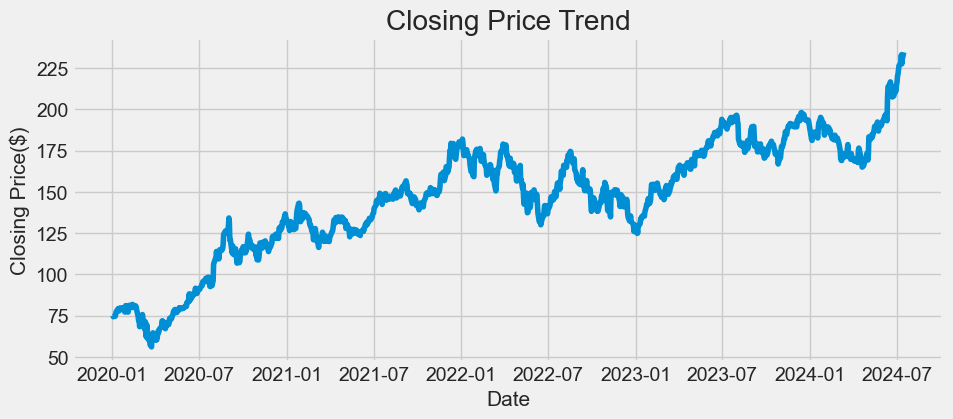

In [152]:
plt.figure(figsize=(10,4))
plt.title('Closing Price Trend')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Closing Price($)', fontsize=15)
plt.show()

In [153]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1083

In [154]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.10642203],
       [0.10233209],
       [0.10565164],
       ...,
       [0.96072557],
       [0.97736531],
       [1.        ]])

In [155]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.10642203, 0.10233209, 0.10565164, 0.10367675, 0.1103999 ,
       0.11942014, 0.12040057, 0.12968695, 0.12369213, 0.12181525,
       0.12727781, 0.13216614, 0.12914071, 0.13072346, 0.13286647,
       0.13157784, 0.1184677 , 0.13070944, 0.14002381, 0.1393655 ,
       0.11925207, 0.1180615 , 0.13233421, 0.13597593, 0.14124238,
       0.13398698, 0.13611596, 0.13339868, 0.14402972, 0.14076616,
       0.14087823, 0.1325443 , 0.13901533, 0.13436514, 0.12421037,
       0.10338258, 0.08923593, 0.09563695, 0.06884235, 0.06861824,
       0.10426501, 0.09097277, 0.10976958, 0.09601515, 0.09056657,
       0.05854754, 0.08539814, 0.07151761, 0.03341971, 0.07507529,
       0.02498776, 0.03990476, 0.03123468, 0.02858744, 0.00682122,
       0.        , 0.03152883, 0.02962394, 0.04772044, 0.0327334 ])]
[0.04263604162889101]

[array([0.10642203, 0.10233209, 0.10565164, 0.10367675, 0.1103999 ,
       0.11942014, 0.12040057, 0.12968695, 0.12369213, 0.12181525,
       0.12727781, 0.13216614, 0.12

In [156]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1023/1023 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.0077


In [157]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


5.51290098816932

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_10752\4007541651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


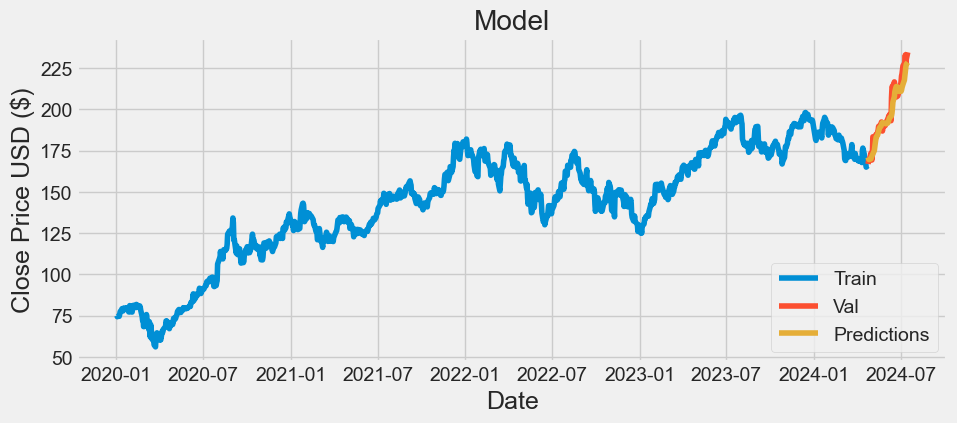

In [196]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(10,4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [194]:
predictions_norm = scaler.transform(predictions)

In [165]:
x_test1 = []
for i in range(30, len(predictions_norm)):
    x_test1.append(predictions_norm[i-30:i, 0])
    
# Convert the data to a numpy array
x_test1 = np.array(x_test1)

# Reshape the data
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1 ))

# Get the models predicted price values 
predictions2 = model.predict(x_test1)
predictions2 = scaler.inverse_transform(predictions2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


In [166]:
predictions2_norm = scaler.transform(predictions2)
predictions_f = np.concatenate((predictions_norm, predictions2_norm), axis=0, out=None, dtype=None, casting="same_kind")

In [167]:
x_test2 = []
for i in range(60, len(predictions_f)):
    x_test2.append(predictions_f[i-60:i, 0])
    
# Convert the data to a numpy array
x_test2 = np.array(x_test2)

# Reshape the data
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

# Get the models predicted price values 
predictionsf = model.predict(x_test2)
predictionsf = scaler.inverse_transform(predictionsf)
predictionsf.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(24, 1)

In [168]:
dates_new = pd.bdate_range(start = '2024-07-16', periods = 24)
FinalPrediction = pd.concat([valid, pd.DataFrame({'Close': np.squeeze(predictionsf),'Predictions': np.squeeze(predictionsf)},index = dates_new)], 
                            axis=0)

In [169]:
FinalPrediction.tail(25)

,Close,Predictions
2024-07-15,234.580002,228.512741
2024-07-16,209.538116,209.538116
2024-07-17,204.057816,204.057816
2024-07-18,199.700226,199.700226
2024-07-19,196.742081,196.742081
2024-07-22,195.173538,195.173538
2024-07-23,194.831390,194.831390
2024-07-24,195.498291,195.498291
2024-07-25,196.952713,196.952713
2024-07-26,198.992844,198.992844


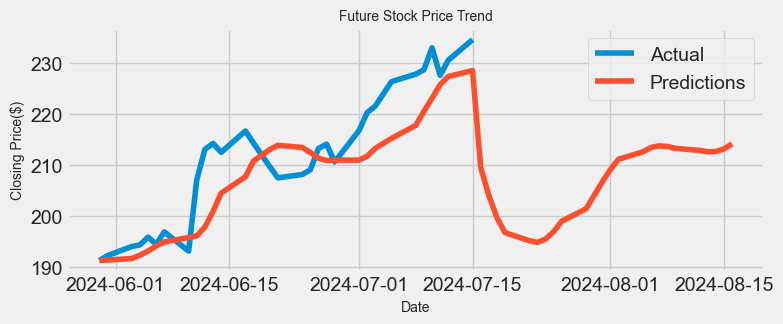

In [193]:
import matplotlib.pyplot as plt

# Specify the start date
start_date = '2024-05-30'

# Plotting
plt.figure(figsize=(8, 3))
plt.title('Future Stock Price Trend', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Closing Price($)', fontsize=10)

# Slicing the dataframes to start from the specified date
valid_subset = valid.loc[start_date:]
predictions_subset = FinalPrediction.loc[start_date:]

plt.plot(valid_subset['Close'])
plt.plot(predictions_subset[['Predictions']])
plt.legend(['Actual', 'Predictions'], loc='upper right')
plt.show()